In [2]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import scipy.linalg as sl
plt.style.use('ggplot')

Laskuharjoitus 1 Tehtävät

In [3]:
def vec_len(*arg):
    return [sqrt(sum(i ** 2)) for i in arg]

Tehtävä 1a

In [4]:
u = np.array([1,-1,2])
v = np.array([-2,2,1])
print(u@v)
'''Vektorit ei ole vastakkaisia u@v!=0'''

-2


'Vektorit ei ole vastakkaisia u@v!=0'

In [5]:
print(f'Vektorien kulma: {degrees(acos((u @ v) / (vec_len(u)[0] * vec_len(v)[0])))}')

Vektorien kulma: 105.79316904826396


1b

x: 0.7071067811865477, y: 1.2247448713915892
x: 0.8660254037844387, y: -0.49999999999999994


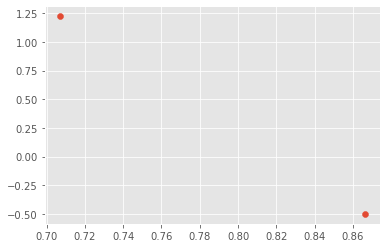

In [6]:
x1 = 2 ** (1/2) * cos(pi/3)
y1 = 2 ** (1/2) * sin(pi/3)
x2 = 1 * cos(-pi/6)
y2 = 1 * sin(-pi/6)
print(f'x: {x1}, y: {y1}')
print(f'x: {x2}, y: {y2}')
plt.scatter([x1, x2], [y1, y2])
plt.show()

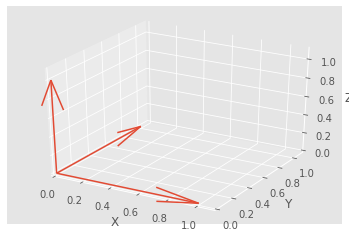

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
soa = np.array([[0, 0, 0, 0, 0, 1], [0,0,0,1,0,0], [0,0,0,0,1,0]])
X, Y, Z, U, V, W = zip(*soa)
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([0, 1.1])
ax.set_ylim([0, 1.1])
ax.set_zlim([0, 1.1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [8]:
a = np.array([1,0,0])
b = np.array([0,1,0])
c = np.array([0,0,1])
print(f'Vektorien kulma: {degrees(acos((a @ b) / (vec_len(a)[0] * vec_len(b)[0])))}')
print(f'Vektorien kulma: {degrees(acos((a @ c) / (vec_len(a)[0] * vec_len(c)[0])))}')

Vektorien kulma: 90.0
Vektorien kulma: 90.0


In [5]:
def three_dim_vector_space(v_set, x_lim=[0,1], y_lim=[0,1], z_lim=[0,1]):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y, Z, U, V, W = zip(*v_set)
    ax.quiver(X, Y, Z, U, V, W, color=cm.jet(Normalize()(np.random.random(len(v_set)*100))))
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_zlim(z_lim)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    return plt

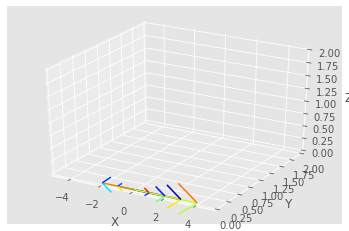

In [26]:
three_dim_vector_space(np.array([[0,0,0,1,0,0], [0,0,0,2,0,0], [0,0,0,3,0,0], [0,0,0,4,0,0],
                        [0,0,0,-1,0,0], [0,0,0,-2,0,0]]), 
                        x_lim=[-5,5], y_lim=[0,2], z_lim=[0,2]).show()

In [4]:
def make_v_set(n, x=True, y=False, z=False, start=0, step=1):
    '''Making vectors starting from origo'''
    v_set = np.empty((0,6))
    for i in np.arange(start, n*step+step, step):
        a = 0 if not x else i
        b = 0 if not y else i
        c = 0 if not y else i
        v_set = np.append(v_set, np.array([[0, 0, 0, a, b, c]]), axis=0)
    return v_set

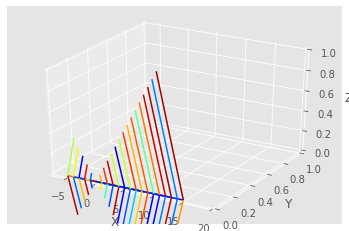

In [30]:
three_dim_vector_space(make_v_set(15, y=False, start=-5, step=1), x_lim=[-7,20]).show()

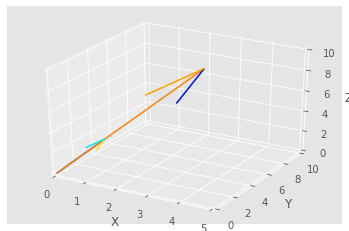

In [31]:
three_dim_vector_space(np.array([[0,0,0,1,2,3], [0,0,0,3,6,9]]), 
                        x_lim=[0,5], y_lim=[0,10], z_lim=[0,10]).show()

In [37]:
u = np.array([1,2,3])
v = np.array([3,6,9])
print(f'Vektorien kulma: {degrees(acos((u @ v) / (vec_len(u)[0] * vec_len(v)[0])))}')
#Line

Vektorien kulma: 0.0


In [38]:
u = np.array([1,0,0])
v = np.array([0,2,3])
print(f'Vektorien kulma: {degrees(acos((u @ v) / (vec_len(u)[0] * vec_len(v)[0])))}')
#Plane

Vektorien kulma: 90.0


In [55]:
def draw_2d_vec(points):
    for i in points:
        plt.plot([0, i[0]], [0, i[1]])
    return plt

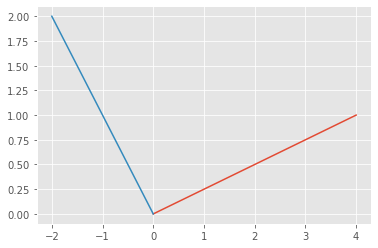

In [56]:
draw_2d_vec([[4,1], [-2,2]]).show()

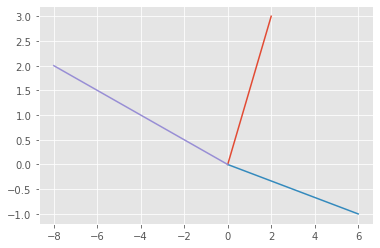

In [62]:
draw_2d_vec([list(np.array([4,1]) + np.array([-2,2]))])
draw_2d_vec([list(np.array([4,1]) - np.array([-2,2]))])
draw_2d_vec([list(np.array([4,1]) * np.array([-2,2]))])
plt.show()

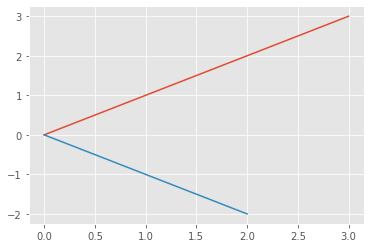

[[5]
 [1]] 

 [[1]
 [5]]


In [76]:
draw_2d_vec([[3,3], [2,-2]]).show()
print((np.array([3,3]) + np.array([2,-2]))[:,np.newaxis],"\n\n", (np.array([3,3]) - np.array([2,-2]))[:,np.newaxis])

In [82]:
a = np.array([[1,0], [-2,1], [1,-1]])
b = np.array([[3],[3],[-6]])
np.linalg.lstsq(a, b)

(array([[3.],
        [9.]]),
 array([6.65965045e-30]),
 2,
 array([2.7578164 , 0.62805153]))

In [88]:
q, r = sl.qr(a)
print(q,"\n\n" , r, "\n\n", np.shape(q), np.shape(r))

[[-4.08248290e-01 -7.07106781e-01  5.77350269e-01]
 [ 8.16496581e-01  1.64776939e-16  5.77350269e-01]
 [-4.08248290e-01  7.07106781e-01  5.77350269e-01]] 

 [[-2.44948974  1.22474487]
 [ 0.         -0.70710678]
 [ 0.          0.        ]] 

 (3, 3) (3, 2)


In [87]:
t = np.dot(q.T, b)
t

array([[ 3.67423461e+00],
       [-6.36396103e+00],
       [ 2.22044605e-15]])

In [94]:
vec_len(np.array([3,4]))

[5.0]

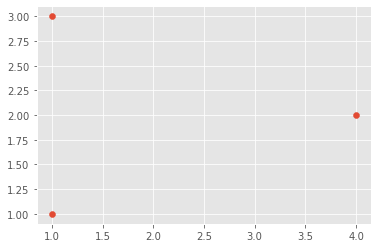

In [101]:
plt.scatter([1,4,1],[1,2,3])

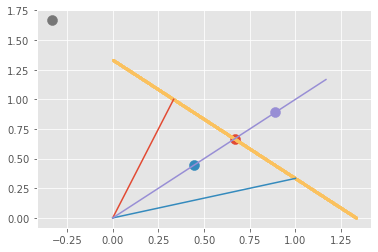

In [140]:
a = [1/3,1]
b = [1,1/3]
draw_2d_vec([a, b])
plt.scatter((a[0] + b[0]) * (1/2), (a[1] + b[1]) * (1/2), s=100)
plt.scatter((a[0] + b[0]) * (1/3), (a[1] + b[1]) * (1/3), s=100)
plt.scatter((a[0] + b[0]) * (2/3), (a[1] + b[1]) * (2/3), s=100)
plt.scatter(-b[0] + (2 * a[0]), -b[1] + (2 * a[1]), s=100)
plt.scatter([(b[0] * i + a[0] * i) for i in np.arange(0, 1, .001)], [(b[0] * i + a[0] * i) for i in np.arange(1, 0, -.001)], s=5)
draw_2d_vec([((np.array(a) + np.array(b)) * .5) + .5])
plt.show()

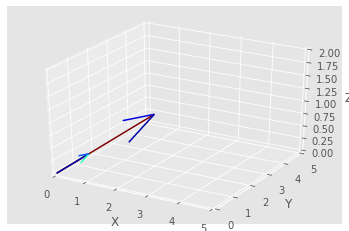

In [19]:
u = np.array([[0,0,0,2,2,1]]) / vec_len(np.array([0,0,0,2,2,1]))
three_dim_vector_space(np.array([[0,0,0,2,2,1], u[0]]), x_lim=[0,5], z_lim=[0,2], y_lim=[0,5])
plt.show()

In [21]:
vec_len(np.array([1,1]))

[1.4142135623730951]